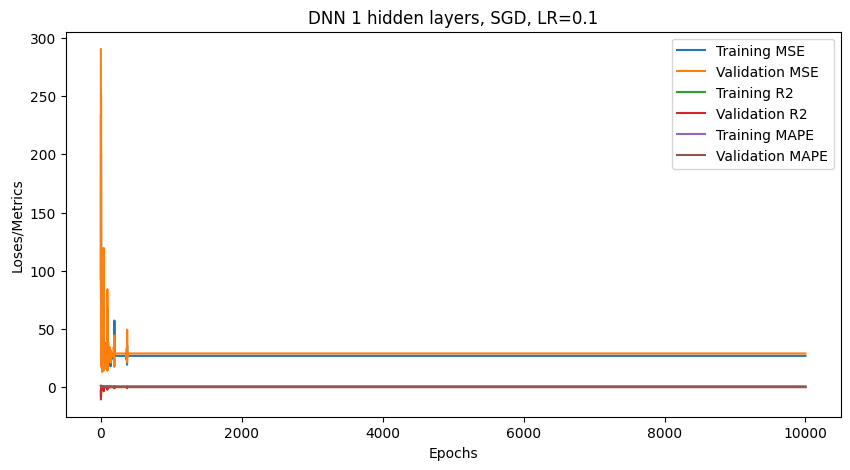

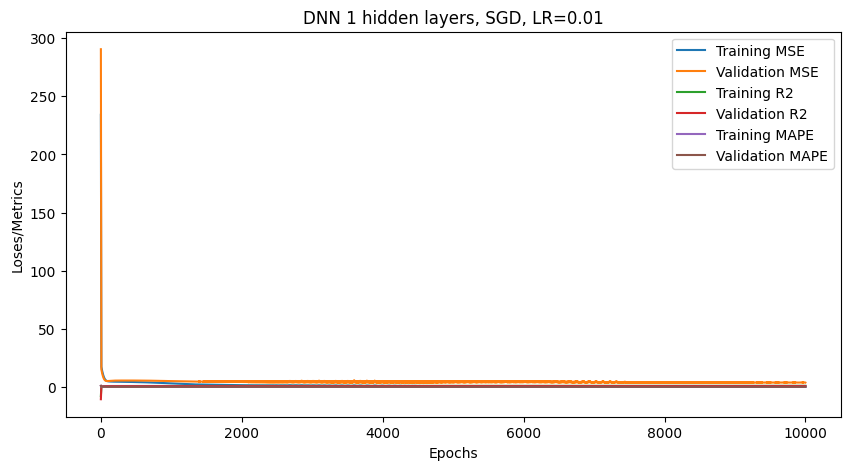

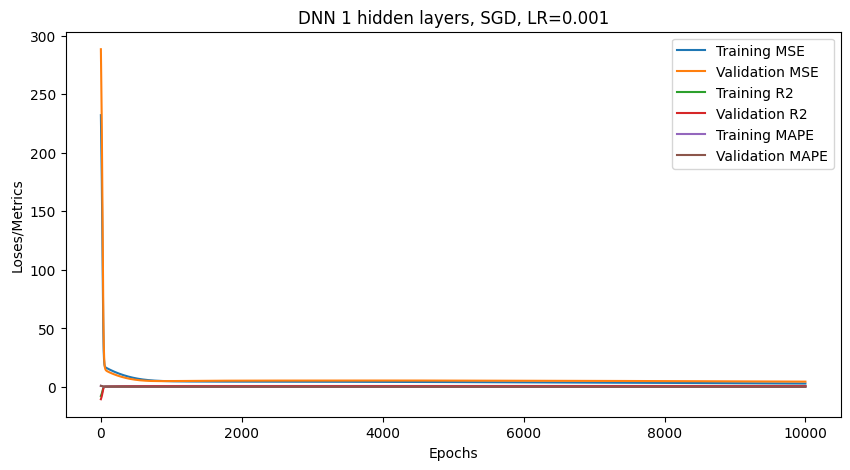

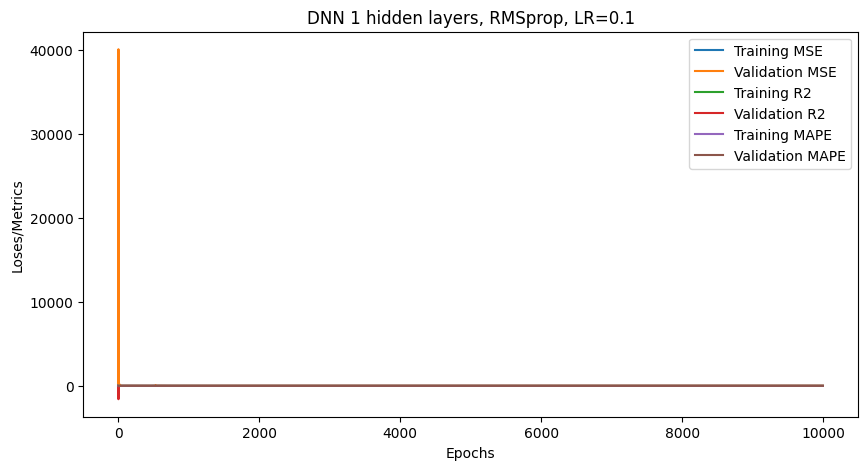

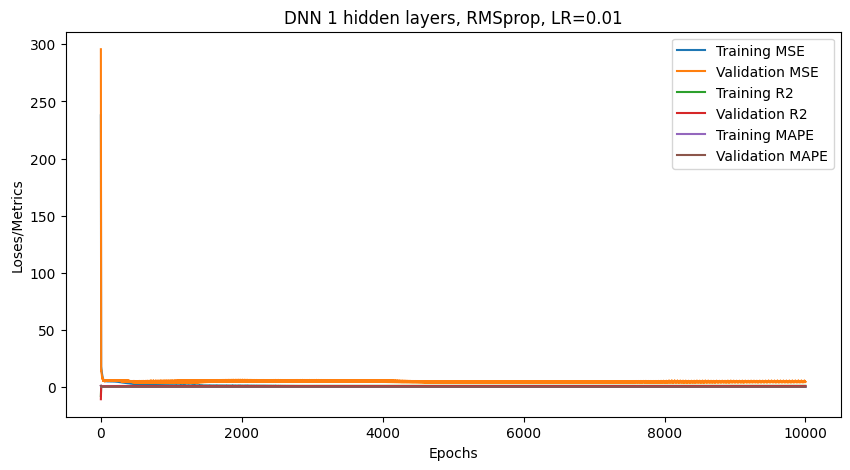

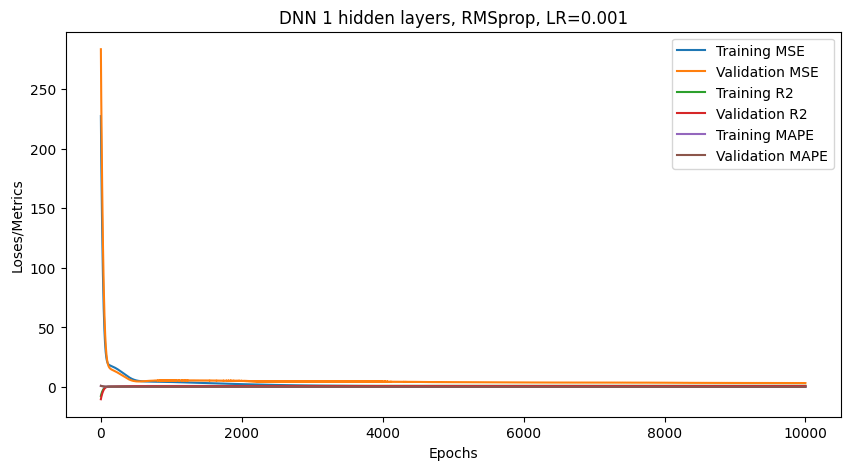

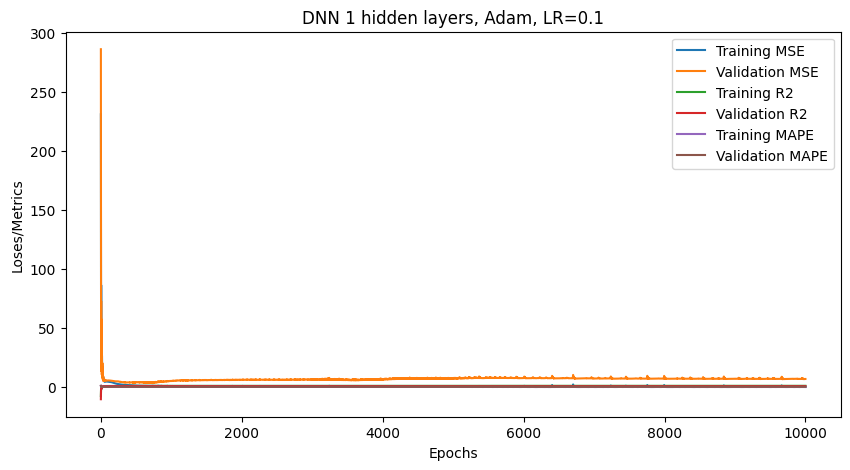

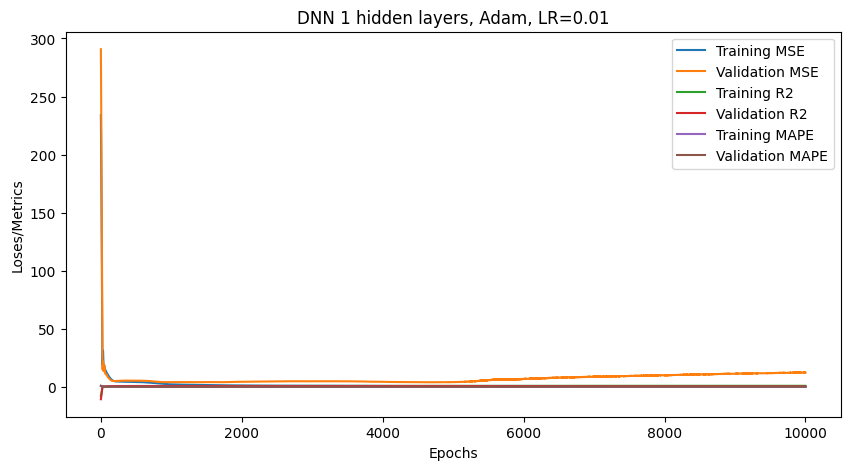

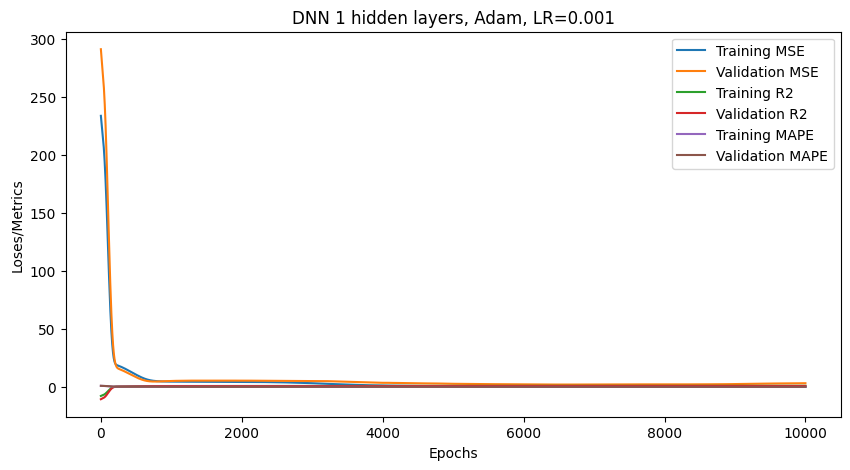

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

class DNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, activation):
        super(DNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_layers[0]))
        layers.append(activation())
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            layers.append(activation())
        layers.append(nn.Linear(hidden_layers[-1], output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

X, y = make_friedman1(n_samples=150, n_features=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

layers_list = [1]
optimizers_list = [optim.SGD, optim.RMSprop, optim.Adam]
learning_rates = [0.1,0.01,0.001]
for layers in layers_list:
    for optimizer in optimizers_list:
        for lr in learning_rates:
            dnn_model = DNN(10, 1, [64]*layers, nn.ReLU)
            dnn_criterion = nn.MSELoss()
            dnn_optimizer = optimizer(dnn_model.parameters(), lr=lr)

            history = {'loss': [], 'val_loss': [], 'train_r2': [], 'val_r2': [], 'train_mape': [], 'val_mape': []}
            for epoch in range(10000):
                dnn_optimizer.zero_grad()
                outputs = dnn_model(torch.Tensor(X_train))
                loss = dnn_criterion(outputs, torch.Tensor(y_train).view(-1, 1))
                history['loss'].append(loss.item())

                with torch.no_grad():
                    val_outputs = dnn_model(torch.Tensor(X_test))
                    val_loss = dnn_criterion(val_outputs, torch.Tensor(y_test).view(-1, 1))
                    history['val_loss'].append(val_loss.item())

                    train_r2 = r2_score(y_train, outputs.detach().numpy())
                    if not np.isnan(train_r2) and not np.isinf(train_r2):
                        history['train_r2'].append(train_r2)

                    val_r2 = r2_score(y_test, val_outputs.detach().numpy())
                    if not np.isnan(val_r2) and not np.isinf(val_r2):
                        history['val_r2'].append(val_r2)

                    train_mape = mean_absolute_percentage_error(y_train, outputs.detach().numpy())
                    if not np.isnan(train_mape) and not np.isinf(train_mape):
                        history['train_mape'].append(train_mape)

                    val_mape = mean_absolute_percentage_error(y_test, val_outputs.detach().numpy())
                    if not np.isnan(val_mape) and not np.isinf(val_mape):
                        history['val_mape'].append(val_mape)

                loss.backward()
                dnn_optimizer.step()

            plt.figure(figsize=(10, 5))
            plt.plot(history['loss'], label='Training MSE')
            plt.plot(history['val_loss'], label='Validation MSE')
            plt.plot(history['train_r2'], label='Training R2')
            plt.plot(history['val_r2'], label='Validation R2')
            plt.plot(history['train_mape'], label='Training MAPE')
            plt.plot(history['val_mape'], label='Validation MAPE')
            plt.title(f'DNN {layers} hidden layers, {optimizer.__name__}, LR={lr}')
            plt.xlabel('Epochs')
            plt.ylabel('Loses/Metrics')
            plt.legend()
            plt.show()

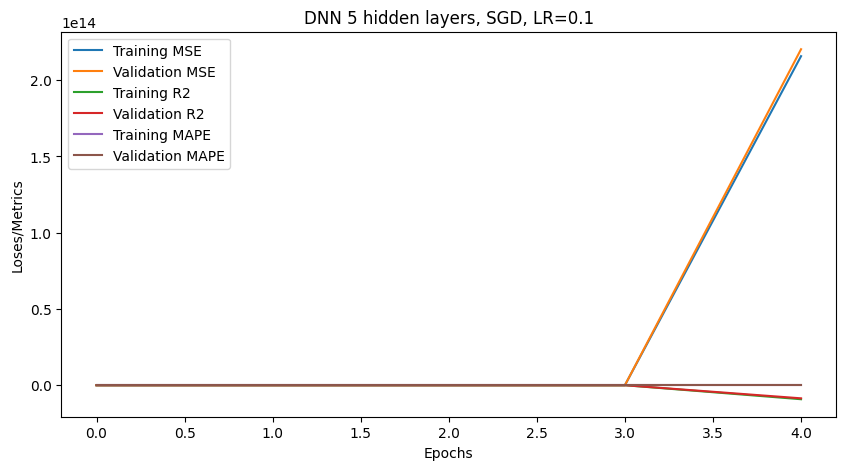

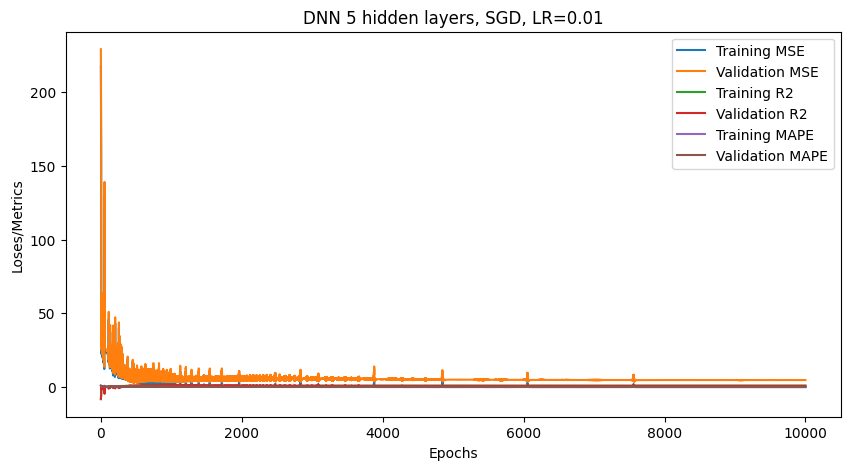

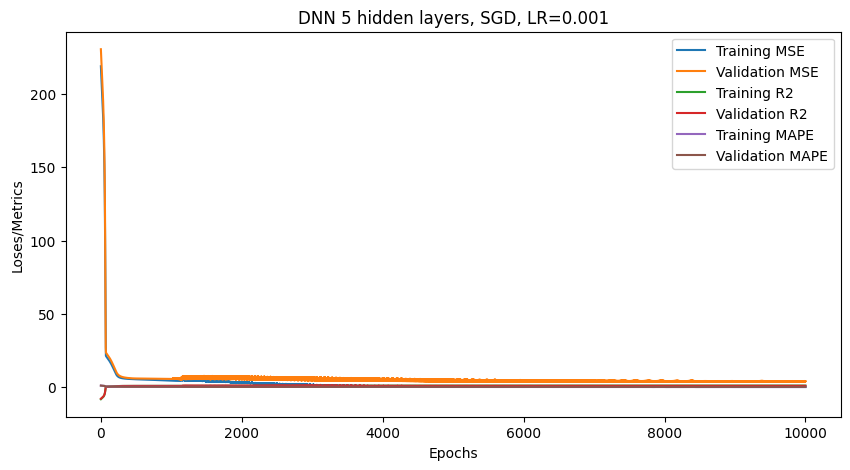

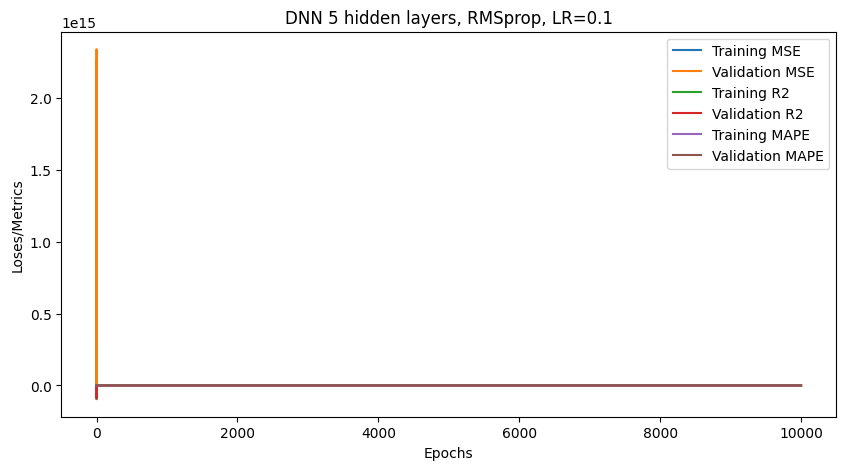

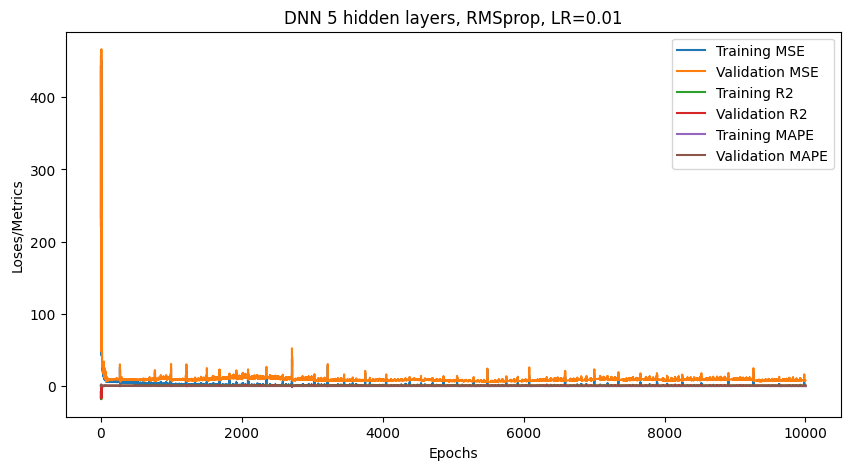

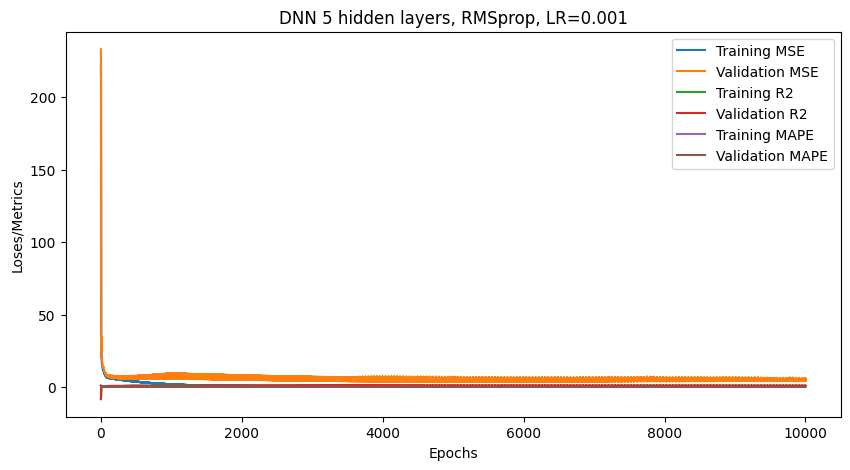

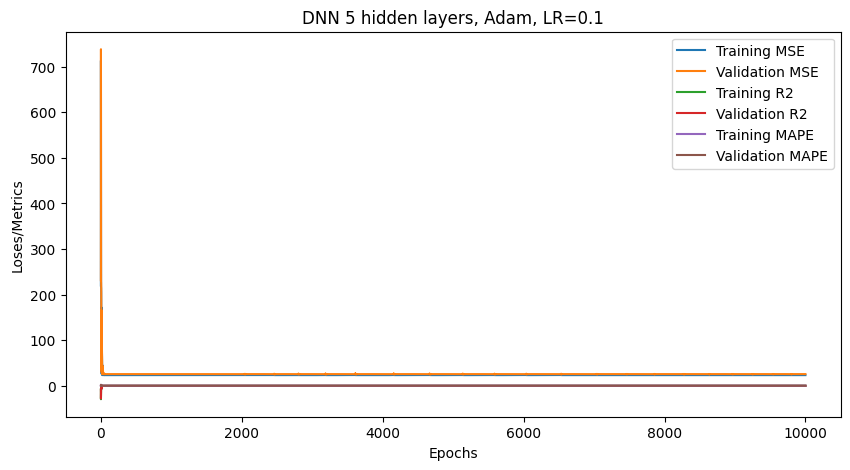

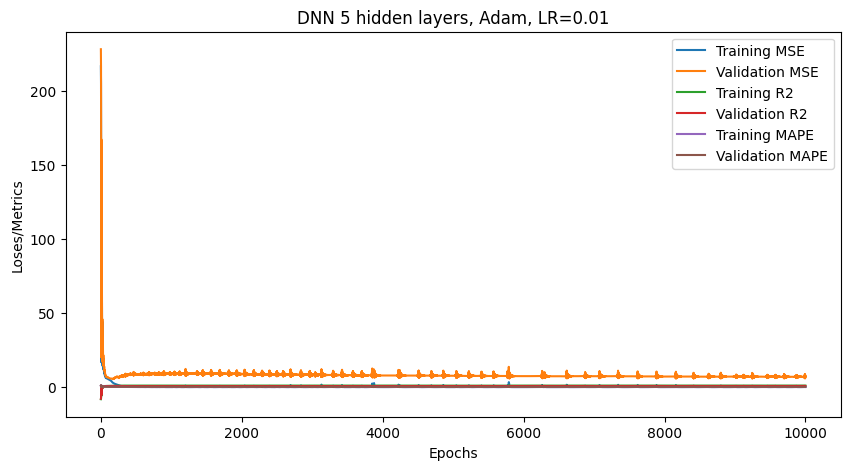

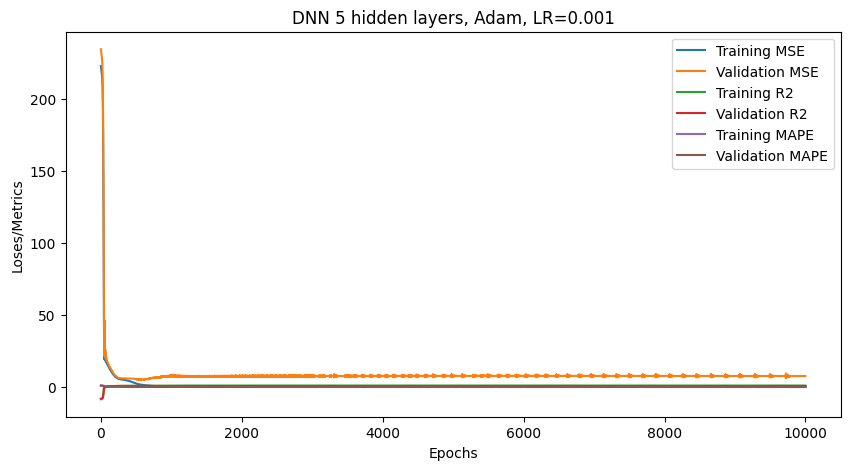

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

class DNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, activation):
        super(DNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_layers[0]))
        layers.append(activation())
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            layers.append(activation())
        layers.append(nn.Linear(hidden_layers[-1], output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

X, y = make_friedman1(n_samples=150, n_features=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

layers_list = [5]
optimizers_list = [optim.SGD, optim.RMSprop, optim.Adam]
learning_rates = [0.1, 0.01, 0.001]
for layers in layers_list:
    for optimizer in optimizers_list:
        for lr in learning_rates:
            dnn_model = DNN(10, 1, [64]*layers, nn.ReLU)
            dnn_criterion = nn.MSELoss()
            dnn_optimizer = optimizer(dnn_model.parameters(), lr=lr)

            history = {'loss': [], 'val_loss': [], 'train_r2': [], 'val_r2': [], 'train_mape': [], 'val_mape': []}
            for epoch in range(10000):
                dnn_optimizer.zero_grad()
                outputs = dnn_model(torch.Tensor(X_train))
                loss = dnn_criterion(outputs, torch.Tensor(y_train).view(-1, 1))
                history['loss'].append(loss.item())

                with torch.no_grad():
                    val_outputs = dnn_model(torch.Tensor(X_test))
                    val_loss = dnn_criterion(val_outputs, torch.Tensor(y_test).view(-1, 1))
                    history['val_loss'].append(val_loss.item())

                    train_pred = outputs.detach().numpy()
                    val_pred = val_outputs.detach().numpy()

                    if np.any(np.isnan(train_pred)) or np.any(np.isinf(train_pred)):
                        pass
                    else:
                        train_r2 = r2_score(y_train, train_pred)
                        history['train_r2'].append(train_r2)
                        train_mape = mean_absolute_percentage_error(y_train, train_pred)
                        history['train_mape'].append(train_mape)

                    if np.any(np.isnan(val_pred)) or np.any(np.isinf(val_pred)):
                        pass
                    else:
                        val_r2 = r2_score(y_test, val_pred)
                        history['val_r2'].append(val_r2)
                        val_mape = mean_absolute_percentage_error(y_test, val_pred)
                        history['val_mape'].append(val_mape)

                loss.backward()
                dnn_optimizer.step()

            plt.figure(figsize=(10, 5))
            plt.plot(history['loss'], label='Training MSE')
            plt.plot(history['val_loss'], label='Validation MSE')
            plt.plot(history['train_r2'], label='Training R2')
            plt.plot(history['val_r2'], label='Validation R2')
            plt.plot(history['train_mape'], label='Training MAPE')
            plt.plot(history['val_mape'], label='Validation MAPE')
            plt.title(f'DNN {layers} hidden layers, {optimizer.__name__}, LR={lr}')
            plt.xlabel('Epochs')
            plt.ylabel('Loses/Metrics')
            plt.legend()
            plt.show()


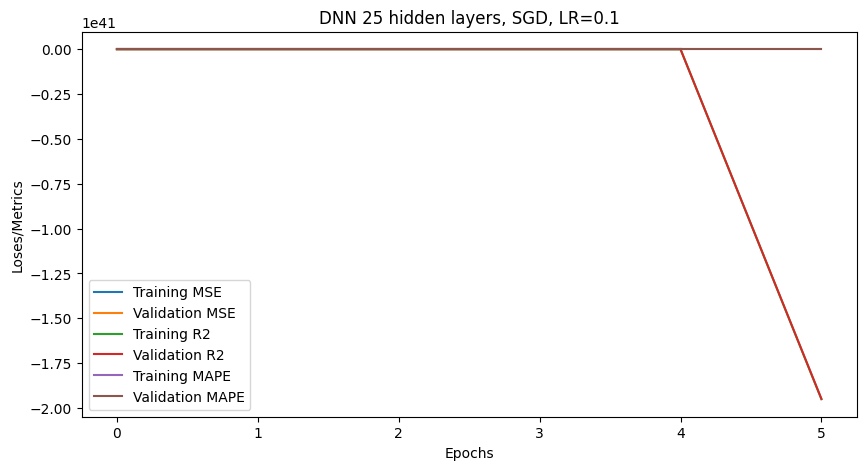

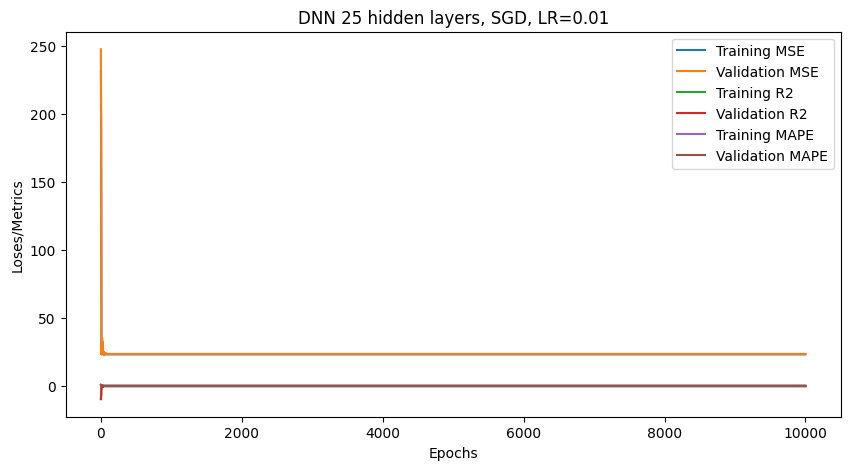

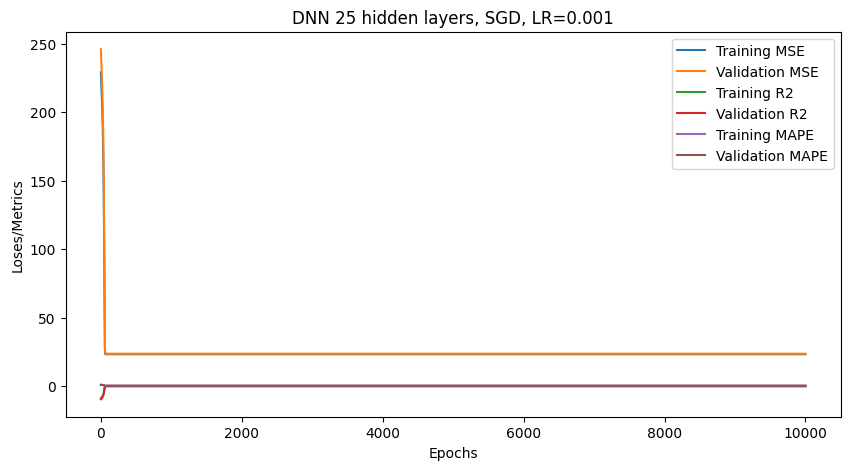

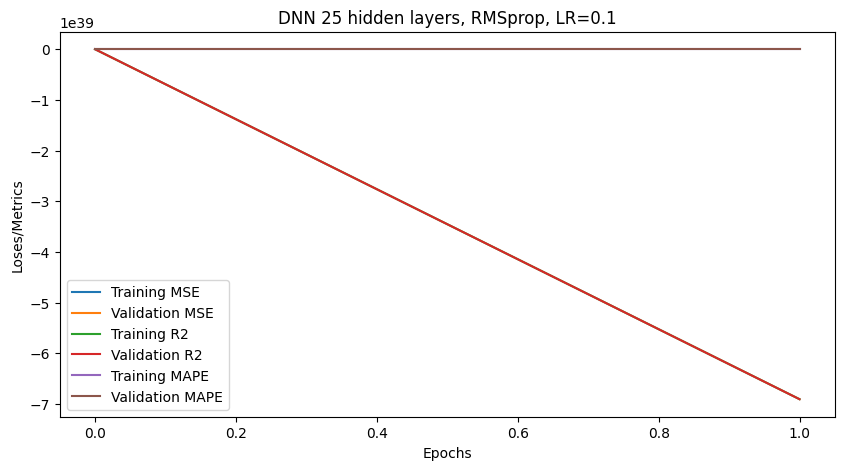

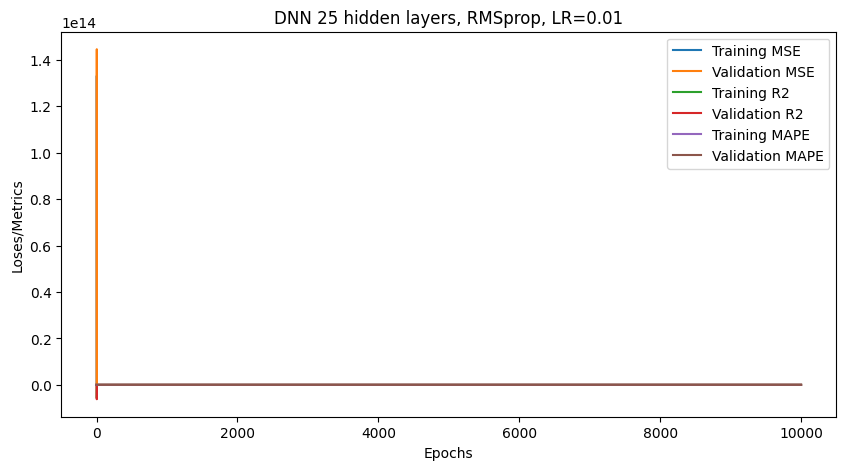

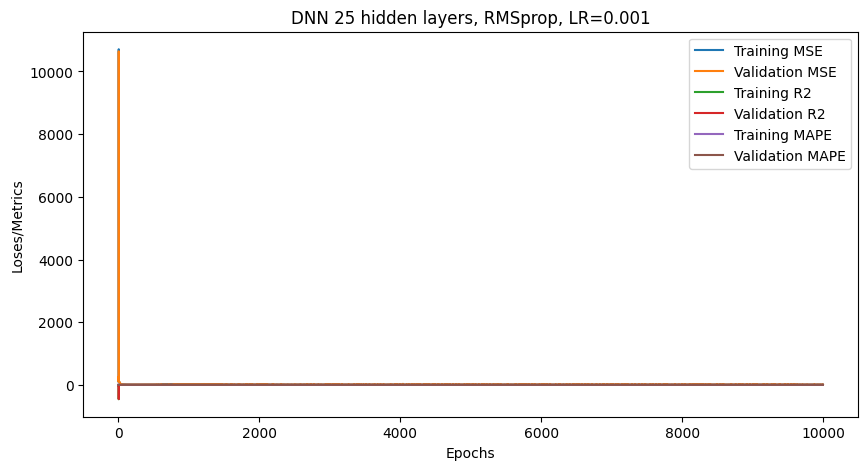

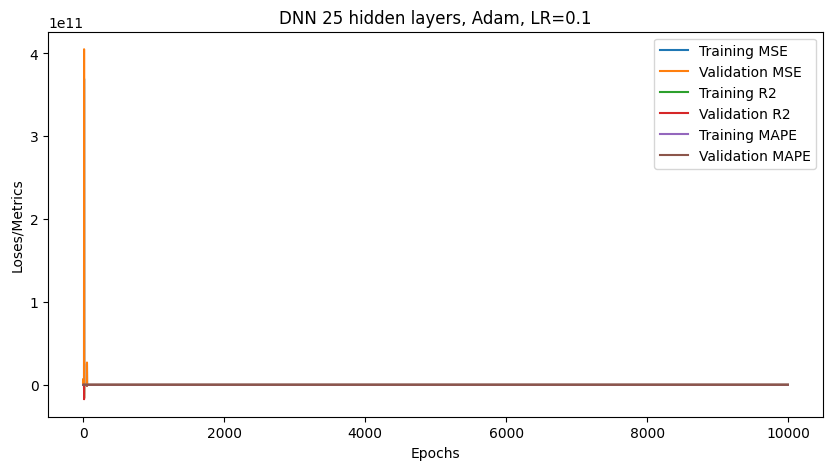

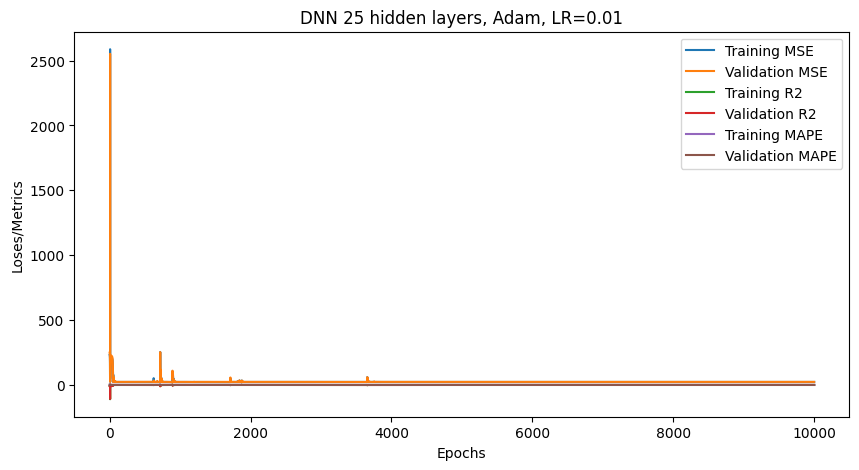

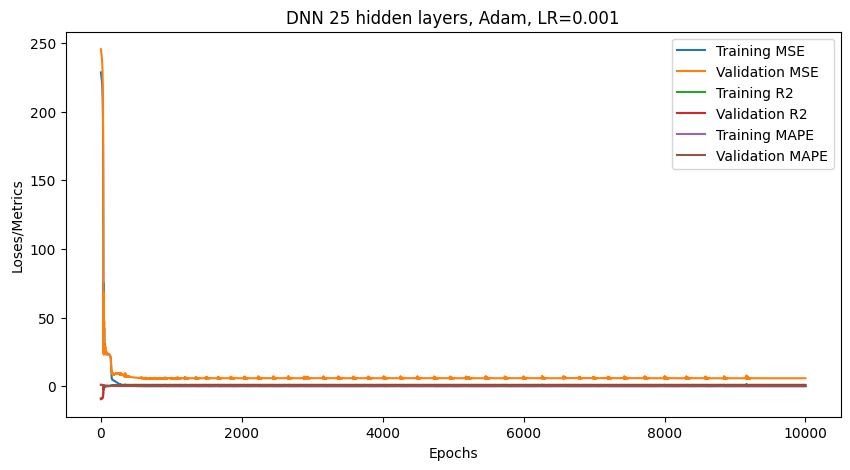

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

class DNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, activation):
        super(DNN, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_layers[0]))
        layers.append(activation())
        for i in range(len(hidden_layers) - 1):
            layers.append(nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            layers.append(activation())
        layers.append(nn.Linear(hidden_layers[-1], output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

X, y = make_friedman1(n_samples=150, n_features=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

layers_list = [25]
optimizers_list = [optim.SGD, optim.RMSprop, optim.Adam]
learning_rates = [0.1, 0.01, 0.001]
for layers in layers_list:
    for optimizer in optimizers_list:
        for lr in learning_rates:
            dnn_model = DNN(10, 1, [64]*layers, nn.ReLU)
            dnn_criterion = nn.MSELoss()
            dnn_optimizer = optimizer(dnn_model.parameters(), lr=lr)

            history = {'loss': [], 'val_loss': [], 'train_r2': [], 'val_r2': [], 'train_mape': [], 'val_mape': []}
            for epoch in range(10000):
                dnn_optimizer.zero_grad()
                outputs = dnn_model(torch.Tensor(X_train))
                loss = dnn_criterion(outputs, torch.Tensor(y_train).view(-1, 1))
                history['loss'].append(loss.item())

                with torch.no_grad():
                    val_outputs = dnn_model(torch.Tensor(X_test))
                    val_loss = dnn_criterion(val_outputs, torch.Tensor(y_test).view(-1, 1))
                    history['val_loss'].append(val_loss.item())

                    train_pred = outputs.detach().numpy()
                    val_pred = val_outputs.detach().numpy()

                    if np.any(np.isnan(train_pred)) or np.any(np.isinf(train_pred)):
                        pass
                    else:
                        train_r2 = r2_score(y_train, train_pred)
                        history['train_r2'].append(train_r2)
                        train_mape = mean_absolute_percentage_error(y_train, train_pred)
                        history['train_mape'].append(train_mape)

                    if np.any(np.isnan(val_pred)) or np.any(np.isinf(val_pred)):
                        pass
                    else:
                        val_r2 = r2_score(y_test, val_pred)
                        history['val_r2'].append(val_r2)
                        val_mape = mean_absolute_percentage_error(y_test, val_pred)
                        history['val_mape'].append(val_mape)

                loss.backward()
                dnn_optimizer.step()

            plt.figure(figsize=(10, 5))
            plt.plot(history['loss'], label='Training MSE')
            plt.plot(history['val_loss'], label='Validation MSE')
            plt.plot(history['train_r2'], label='Training R2')
            plt.plot(history['val_r2'], label='Validation R2')
            plt.plot(history['train_mape'], label='Training MAPE')
            plt.plot(history['val_mape'], label='Validation MAPE')
            plt.title(f'DNN {layers} hidden layers, {optimizer.__name__}, LR={lr}')
            plt.xlabel('Epochs')
            plt.ylabel('Loses/Metrics')
            plt.legend()
            plt.show()
